In [2]:
import numpy as np
import torchvision as vision
import cv2
import torch
import torch.nn.functional as F
import torch.nn as nn
from PIL import Image
from torchvision import transforms
import scipy.signal
import matplotlib.pyplot as plt
import os
import pandas as pd
from torch.autograd import variable
from tqdm import trange

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [4]:
##load data to be trained


##reading the data from the csv file
test = pd.read_csv("csv/mnist_test.csv")
test_labels = test.loc[:, "label"].to_numpy()

train = pd.read_csv("csv/mnist_train.csv")
train_labels = train.loc[:, "label"].to_numpy()


##dropping the labels and creating a 28,28 numpy array
#then creating the binary vector for each digit class for the labels

test = (test.drop(labels="label", axis=1).to_numpy()).reshape(-1, 28,28)
test_labels = torch.from_numpy(np.eye(10)[test_labels]).to(torch.float32)


train = (train.drop(labels="label", axis=1).to_numpy()).reshape(-1,28, 28)
train_labels = torch.from_numpy(np.eye(10)[train_labels]).to(torch.float32)

##resizing the array to proper dimensions

train = (torch.from_numpy(train).reshape(-1,28,28) * 1.0)/255
test = (torch.from_numpy(test).reshape(-1, 28,28)*1.0)/255


print(train.shape)




torch.Size([60000, 28, 28])


In [5]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()

        ##layer 1 has an input of 784 nodes and an output of 284 nodes
        self.l1 = nn.Linear(784, 284)

        #layer 2 has an input of 284 nodes and an input of 50 nodes
        self.l2 = nn.Linear(284, 50)

        #layer 3 has an input of 50 nodes and an ouptu of top nodes for each of the 10 dgits
        self.l3 = nn.Linear(50,10)

        ##instance of the reLU avtication function and in the forward it is applied to each layer
        self.ReLu = nn.ReLU()
    
    def forward(self, x):
        x = self.ReLu(self.l1(x))
        x = self.ReLu(self.l2(x))

        ## no need for activation on the ouput layer
        x = self.l3(x)
        return x





In [6]:
#define loss function helps us calculate the backpropagation/optimization  function

cnn=NeuralNetwork()

loss_func=nn.CrossEntropyLoss()

from torch import optim

##learning rate 
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.01) 




# error=output-actual 

In [19]:

num_epochs=3



# is an epoch
for epoch in range(num_epochs):
    ##loops though each of the 6000 samples
    for i in trange(train.shape[0]):
        optimizer.zero_grad()
        compressed_output=train[i].flatten()
        output = cnn(compressed_output)
        loss = loss_func(output, train_labels[i])
        loss.backward()
        optimizer.step()



















100%|██████████| 60000/60000 [07:35<00:00, 131.79it/s] 


In [20]:

##checking the accuracy of our model

correct=0
incorrect=0
counter=0

correct_images=[]
incorrect_images=[]

for i,data in enumerate(test):
    squeezed_output=train[i].flatten()

    output = torch.argmax(cnn(squeezed_output)).item()
    suggested = torch.argmax(test_labels[i]).item()

    if output == suggested:
        correct+= 1
        correct_images.append(i)
    else:
        incorrect_images.append(i)
        incorrect += 1
    counter+=1
    
print(f"Accuracy: {correct/counter * 100}%")


Accuracy: 10.2%


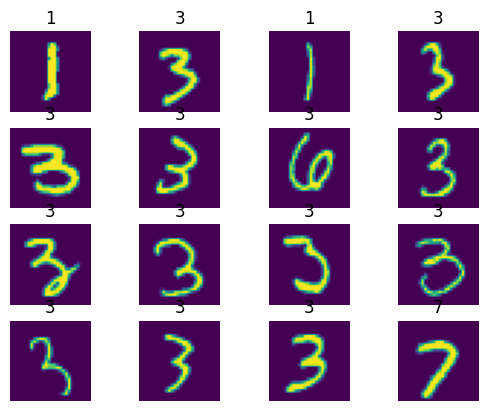

In [21]:
import matplotlib.pyplot as plt
import numpy as np


images=[]
titles=[]
incorrect = incorrect_images[0:16]
correct=correct_images[0:16]


for i in correct:
    images.append(test[i].numpy())
    titles.append(torch.argmax(cnn(test[i].flatten())).item())

fig, axes = plt.subplots(nrows=4, ncols=4)

for ax, img, title in zip(axes.flatten(), images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.show()
